In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pyfits as pf
import matplotlib
from matplotlib import pyplot as plt
import lmfit
from lmfit import minimize, Parameters, report_fit, fit_report
from IPython.display import Image

In [4]:
apf_file = pf.open('ucb-amp194.fits')

In [5]:
header = apf_file[0].header
print repr(header)

SIMPLE  =                    T / NORMAL FITS IMAGE                              
BITPIX  =                   16 / DATA PRECISION                                 
NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     
NAXIS1  =                 2080 / NUMBER OF COLUMNS                              
NAXIS2  =                 4608 / NUMBER OF ROWS                                 
CRVAL1U =                    0 / COLUMN ORIGIN                                  
CRVAL2U =                    0 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                    1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                  194 / OBSERVATION NUMBER                             
IDNUM   =                    3 / IMAGE ID                                       
UGEOM   =                    1 / UCAM READOUT GEOMETRY                          
DGEOM   =                   

In [6]:
print "Right Ascension: " + header['RA']
print "Declination: " + header['DEC']
print "Target Object: " + header['TOBJECT']

Right Ascension: 20:06:15.5
Declination:  44:27:24.6
Target Object: KIC8462852


In [7]:
image = apf_file[0].data

Text(0.5,1,'2D Array Data')

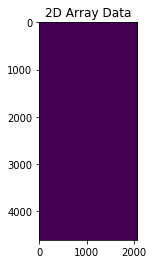

In [8]:
plt.imshow(image)
plt.title('2D Array Data')

Text(0.5,1,'2D array data w/ contrast')

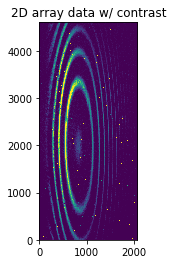

In [9]:
plt.imshow(image, vmin = np.median(image), vmax = np.median(image) * 1.2, origin = 'lower')
plt.title('2D array data w/ contrast')

Text(0.5,1,'2D array w/ contrast and rotated')

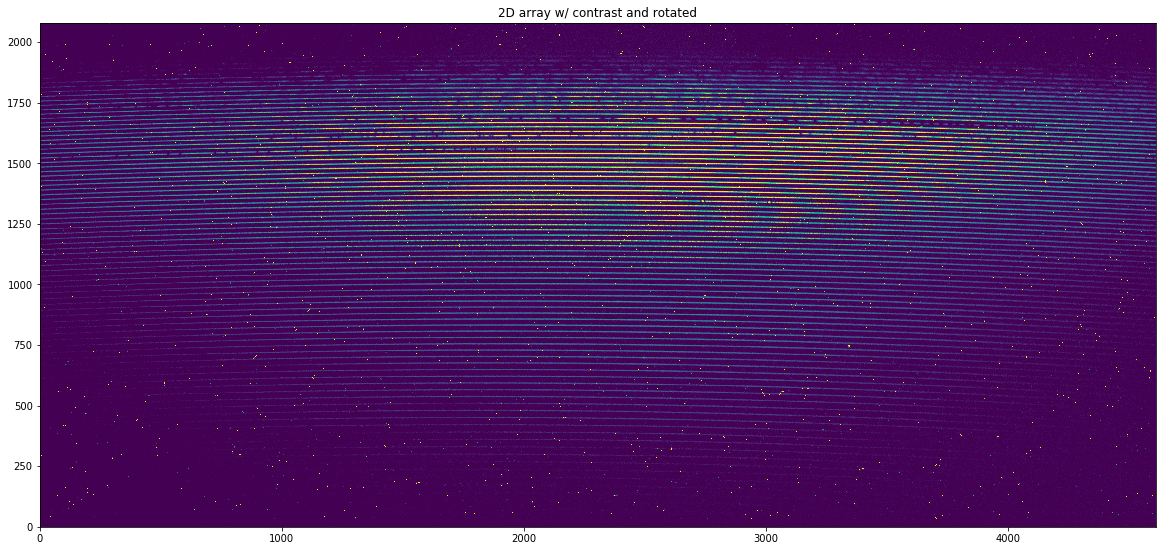

In [10]:
image_rot = np.rot90(image)
plt.figure(figsize=(20,20))
plt.imshow(image_rot, vmin = np.median(image_rot), vmax = np.median(image_rot) * 1.2, origin = 'lower')
plt.title('2D array w/ contrast and rotated')

Text(0.5,1,'2D array w/ contrast and rotated AND flipped')

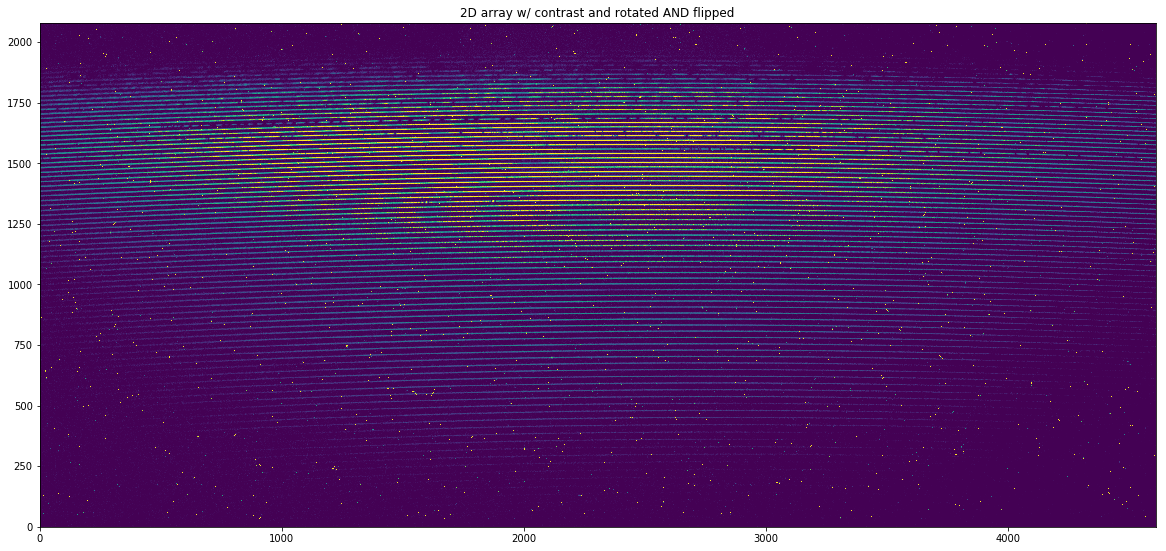

In [12]:
image_flip = np.fliplr(image_rot)
plt.figure(figsize=(20,20))
plt.imshow(image_flip, vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')
plt.title('2D array w/ contrast and rotated AND flipped')

Text(0.5,1,'Final 2D array (Our Spectrum!)')

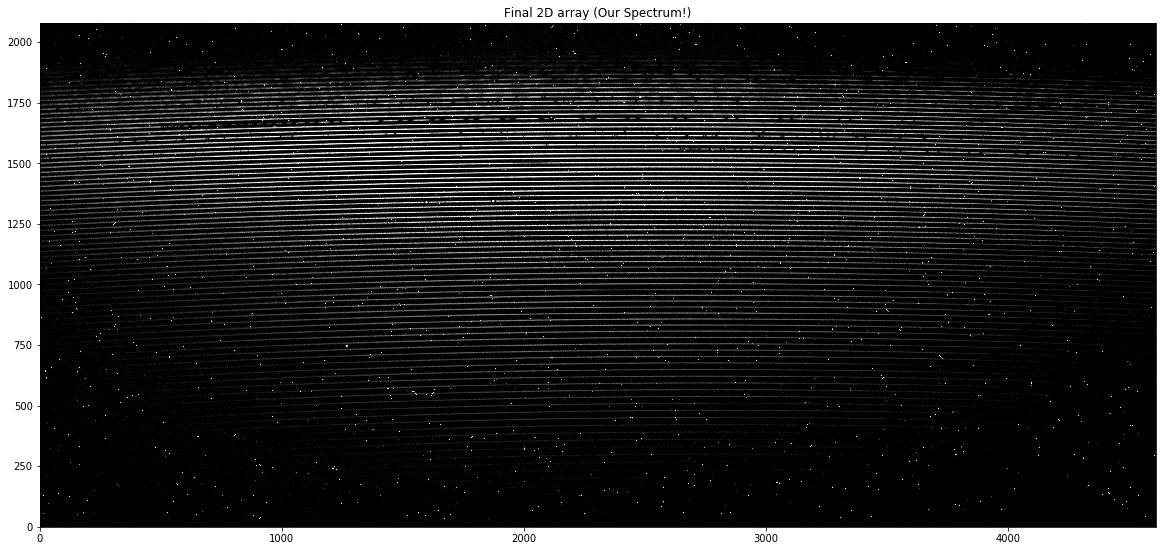

In [13]:
plt.figure(figsize=(20,20))
plt.imshow(image_flip, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')
plt.title('Final 2D array (Our Spectrum!)')

Text(0.5,1,'small patch [1683:1688, 2200:2800] of telluric lines')

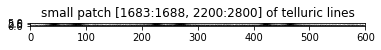

In [14]:
patch = image_flip[1683:1688, 2200:2800]
plt.imshow(patch, cmap = 'gray', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, 
           origin = 'lower')
plt.title('small patch [1683:1688, 2200:2800] of telluric lines')

Text(0.5,1,'small patch [1683:1688, 2200:2800] of telluric lines')

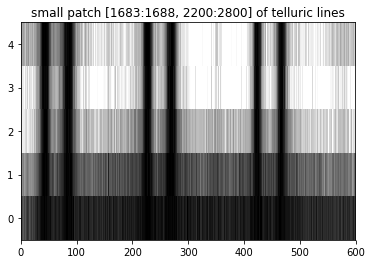

In [15]:
plt.imshow(image_flip[1683:1688, 2200:2800], cmap = 'gray', aspect = 'auto', 
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [1683:1688, 2200:2800] of telluric lines')

In [16]:
patch = image_flip[1683:1688, 2200:2800]
patch.size

3000

In [17]:
telluric_1D = np.sum(patch, axis = 0)

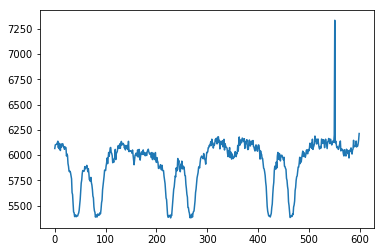

In [18]:
plt.plot(telluric_1D)


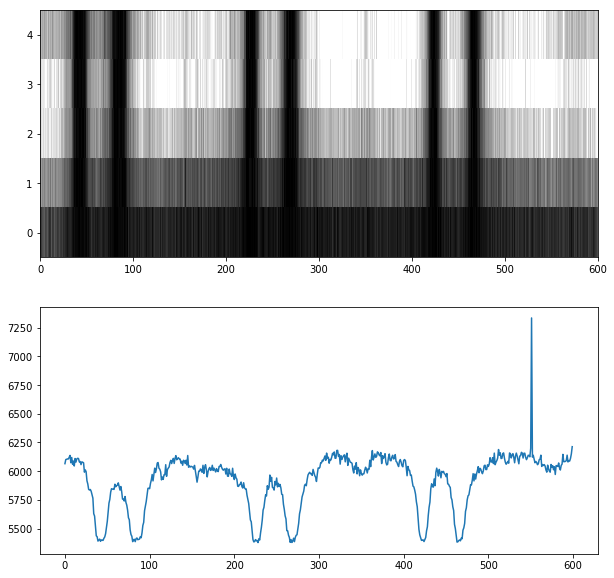

In [19]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.imshow(image_flip[1683:1688,2200:2800], cmap = 'gray', aspect = 'auto', 
           interpolation = 'nearest', origin = 'lower',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)
plt.subplot(2,1,2)
plt.plot(telluric_1D)

In [20]:
bias = np.median(image_flip[-30:])
print(bias)

1073.0


Text(0.5,1,'Telluric Absorption (Adjusted) [1683:1688, 2200:2800]')

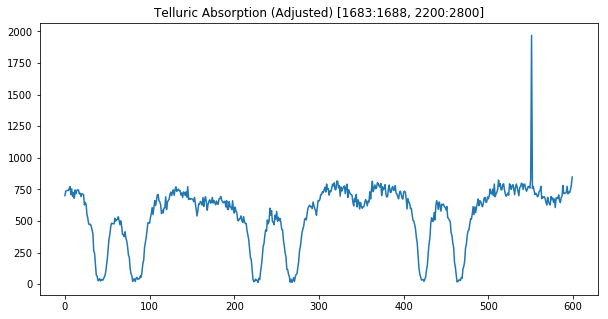

In [21]:
plt.figure(figsize=(10,5))
telluric_1D_adj = telluric_1D - (5*bias)
plt.plot(telluric_1D_adj)
plt.title('Telluric Absorption (Adjusted) [1683:1688, 2200:2800]')